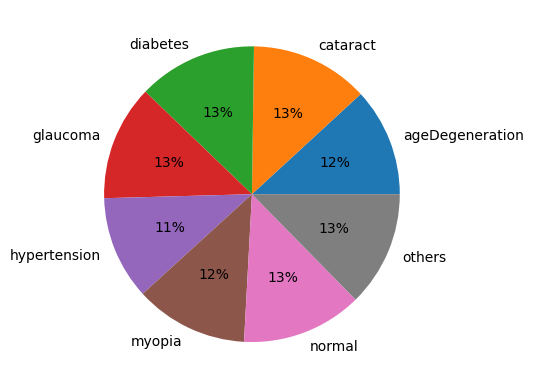

In [25]:
import matplotlib.pyplot as plt

classes = ['ageDegeneration', 'cataract','diabetes', 'glaucoma', 'hypertension', 'myopia', 'normal','others' ]
classes_count= [ 7152, 7812, 7870, 7620, 6845, 7474, 7982, 7630]
plt.pie(classes_count , labels=classes , autopct='%0.f%%')
plt.show()

In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import splitfolders
basic_data = '/kaggle/input/project-dataset/project_3_dataset'
splitfolders.ratio(basic_data , output = "output_dataset" , seed=1337 , ratio=(0.8,0.1,0.1) , group_prefix=None)

Copying files: 60385 files [07:58, 126.09 files/s]


In [3]:
train_path = '/kaggle/working/output_dataset/train'
validation_path ='/kaggle/working/output_dataset/val'
test_path = '/kaggle/working/output_dataset/test'

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

83683744/83683744 [==============================] - 0s 0us/step


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2,
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory('/kaggle/working/output_dataset/train',
                                                    target_size=(299,299),
                                                    batch_size=32, 
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory('/kaggle/working/output_dataset/val',
                                                              target_size=(299 , 299),
                                                              batch_size=32, 
                                                              class_mode='categorical')

Found 48306 images belonging to 8 classes.
Found 6037 images belonging to 8 classes.


In [8]:
opt= tf.keras.optimizers.experimental.SGD(learning_rate=0.01, momentum=0.9, nesterov = True)

In [9]:
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_generator, 
          steps_per_epoch = len(train_generator),
          epochs = 20,          
          validation_data=validation_generator, 
          validation_steps = len(validation_generator))

Epoch 1/20
1510/1510 [==============================] - 1574s 1s/step - loss: 0.8321 - accuracy: 0.6858 - val_loss: 0.7133 - val_accuracy: 0.7252
Epoch 2/20
1510/1510 [==============================] - 1529s 1s/step - loss: 0.4252 - accuracy: 0.8373 - val_loss: 0.4981 - val_accuracy: 0.8128
Epoch 3/20
1510/1510 [==============================] - 1535s 1s/step - loss: 0.2837 - accuracy: 0.8887 - val_loss: 0.3971 - val_accuracy: 0.8469
Epoch 4/20
1510/1510 [==============================] - 1539s 1s/step - loss: 0.2072 - accuracy: 0.9194 - val_loss: 0.3051 - val_accuracy: 0.8895
Epoch 5/20
1510/1510 [==============================] - 1527s 1s/step - loss: 0.1561 - accuracy: 0.9404 - val_loss: 0.2422 - val_accuracy: 0.9157
Epoch 6/20
1510/1510 [==============================] - 1530s 1s/step - loss: 0.1262 - accuracy: 0.9529 - val_loss: 0.2341 - val_accuracy: 0.9230
Epoch 7/20
1510/1510 [==============================] - 1540s 1s/step - loss: 0.0967 - accuracy: 0.9643 - val_loss: 0.1660 -

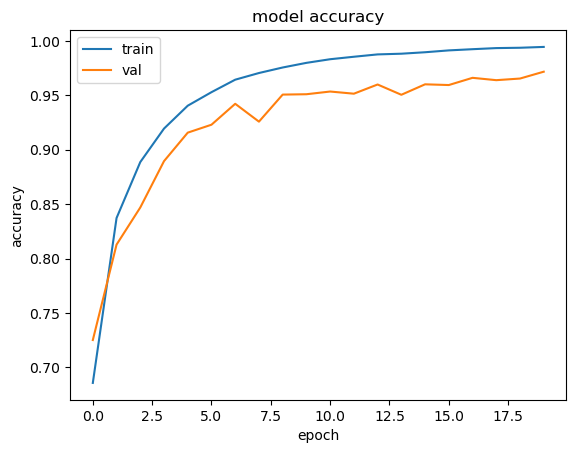

In [11]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

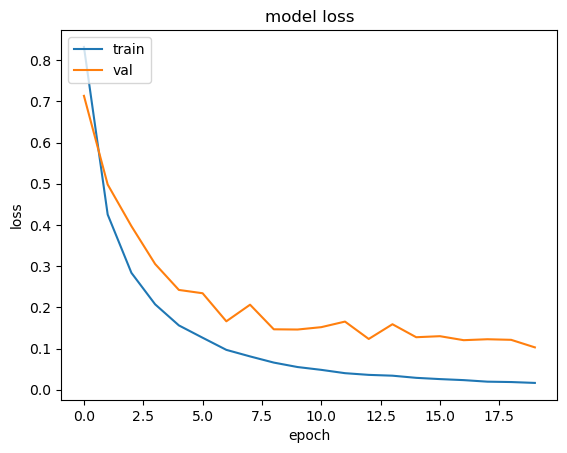

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/kaggle/working/output_dataset/test',
                                            target_size = (299,299),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 6042 images belonging to 8 classes.


In [15]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('test accuracy:',test_acc )
print('test loss:',test_loss)

189/189 [==============================] - 45s 239ms/step - loss: 0.0790 - accuracy: 0.9752
test accuracy: 0.9751737713813782
test loss: 0.07898575067520142


In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

In [18]:
y_pred = model.predict(test_generator, workers = 0)
y_pred_classes = np.argmax(y_pred , axis=1)
y_true = test_generator.classes[test_generator.index_array]
class_names = list(test_generator.class_indices.keys())
#class_names = ['ageDegeneration','cataract','diabetes','glaucoma','hypertension','myopia','normal','others']

189/189 [==============================] - 44s 231ms/step


In [ ]:
#Predections = model.predict(test_generator,workers = 0)
#y_true = test_ds.map(lambda x,y:y).unbatch()
#y_true = np.array([y.numpy() for y in y_true])

In [19]:
cr = classification_report(y_true , y_pred_classes , target_names=class_names )
print (classification_report(y_true , y_pred_classes , target_names=class_names))

                 precision    recall  f1-score   support

ageDegeneration       1.00      1.00      1.00       716
       cataract       0.99      1.00      1.00       782
       diabetes       0.96      0.89      0.93       787
       glaucoma       1.00      1.00      1.00       762
   hypertension       0.99      1.00      0.99       685
         myopia       1.00      1.00      1.00       748
         normal       0.91      0.93      0.92       799
         others       0.97      0.99      0.98       763

       accuracy                           0.98      6042
      macro avg       0.98      0.98      0.98      6042
   weighted avg       0.98      0.98      0.98      6042



In [20]:
cm = confusion_matrix(y_true ,y_pred_classes)
print(cm)

[[716   0   0   0   0   0   0   0]
 [  0 782   0   0   0   0   0   0]
 [  1   2 704   1   6   0  67   6]
 [  0   1   0 759   0   0   2   0]
 [  0   0   0   0 685   0   0   0]
 [  0   0   0   0   0 748   0   0]
 [  0   3  25   2   4   2 746  17]
 [  2   1   3   0   0   0   5 752]]


Text(0.5, 1.0, 'Confusion Matrix')

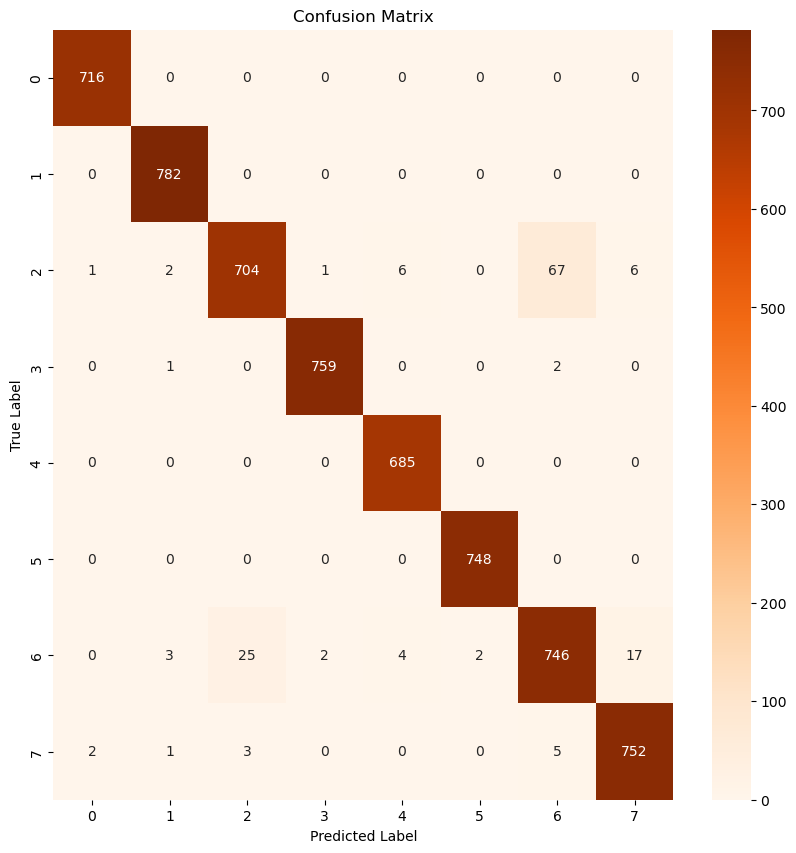

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=ax)

# Add axis labels and title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

In [24]:
model.save('XCEPTION_SGD.h5')